In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import keras
import tensorflow as tf

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
#display setting
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
bank = pd.read_csv("D:\\Users\\zsy\\Desktop\\python PJ\\bank.csv")

In [8]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
bank['month'][bank['month']=='apr']=4
bank['month'][bank['month']=='aug']=8
bank['month'][bank['month']=='dec']=12
bank['month'][bank['month']=='feb']=2
bank['month'][bank['month']=='jan']=1
bank['month'][bank['month']=='jul']=7
bank['month'][bank['month']=='jun']=6
bank['month'][bank['month']=='mar']=3
bank['month'][bank['month']=='may']=5
bank['month'][bank['month']=='nov']=11
bank['month'][bank['month']=='oct']=10
bank['month'][bank['month']=='sep']=9
bank['month'] = bank['month'].apply(lambda x:int(x))

In [10]:
continous=['age','balance','day','month','duration','campaign','pdays','previous','y']
total = ['age','balance','day','month','duration','campaign','pdays','previous','job','marital','education','default','housing','loan','contact','poutcome','y']

In [11]:
bank_con = bank[continous]
bank=bank[total]

#### build networks(withou cat)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(bank_con.drop(columns = ['y']),bank_con['y'],train_size=0.8,random_state=2020)

x_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [13]:
#standardization of the features:
from sklearn.preprocessing import StandardScaler

x_train_scaled = x_train
x_test_scaled = x_test

scaler = StandardScaler().fit(x_train.iloc[:,0:8])
x_train_scaled.iloc[:,0:8] = scaler.transform(x_train.iloc[:,0:8])
x_test_scaled.iloc[:,0:8] = scaler.transform(x_test.iloc[:,0:8])

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_train.columns)

In [14]:
#data processing on y for the use of keras and tensorflow
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le = LabelEncoder().fit(y_train)
y_train_ohc = le.transform(y_train)
y_test_ohc = le.transform(y_test)

lb = LabelBinarizer().fit(y_train_ohc)
y_train_ohc = lb.transform(y_train_ohc)
y_test_ohc = lb.transform(y_test_ohc)

print("le labels:", le.classes_)
print("lb labels:", lb.classes_)

le labels: ['no' 'yes']
lb labels: [0 1]


In [15]:
from keras import layers
# Create sequential model
model_drop = keras.Sequential()

# Add layers, first layer needs input dimension
model_drop.add(layers.Dense(80, input_shape = (x_train.shape[1],), activation="relu"))
model_drop.add(layers.Dropout(0.2))
model_drop.add(layers.Dense(80, activation="relu"))
model_drop.add(layers.Dropout(0.2))
model_drop.add(layers.Dense(1, activation = "sigmoid"))

# add loss function and optimizer
model_drop.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Model structure
model_drop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                720       
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [16]:
help(model_drop)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalu

In [17]:
# fit model with our training data set, training will bedone for 300 times data set
bank_tf = model_drop.fit(x = x_train_scaled, y = y_train_ohc, 
                    shuffle = True, 
                    #validation_split = 0.3,
                    batch_size = 32,                    
                    epochs = 600
                   )

Epoch 1/600
113/113 [==============================] - 0s 759us/step - loss: 1.3912e-08 - accuracy: 0.6861
Epoch 2/600
113/113 [==============================] - 0s 759us/step - loss: 1.3912e-08 - accuracy: 0.6900
Epoch 3/600
113/113 [==============================] - 0s 768us/step - loss: 1.3912e-08 - accuracy: 0.6787
Epoch 4/600
113/113 [==============================] - 0s 817us/step - loss: 1.3912e-08 - accuracy: 0.6991
Epoch 5/600
113/113 [==============================] - 0s 830us/step - loss: 1.3912e-08 - accuracy: 0.6864
Epoch 6/600
113/113 [==============================] - 0s 751us/step - loss: 1.3912e-08 - accuracy: 0.6800
Epoch 7/600
113/113 [==============================] - 0s 750us/step - loss: 1.3912e-08 - accuracy: 0.6858
Epoch 8/600
113/113 [==============================] - 0s 786us/step - loss: 1.3912e-08 - accuracy: 0.6892
Epoch 9/600
113/113 [==============================] - 0s 1ms/step - loss: 1.3912e-08 - accuracy: 0.6892
Epoch 10/600
113/113 [=================

Epoch 77/600
113/113 [==============================] - 0s 725us/step - loss: 1.3912e-08 - accuracy: 0.6872
Epoch 78/600
113/113 [==============================] - 0s 740us/step - loss: 1.3912e-08 - accuracy: 0.6845
Epoch 79/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6881
Epoch 80/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6939
Epoch 81/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6836
Epoch 82/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.6811
Epoch 83/600
113/113 [==============================] - 0s 723us/step - loss: 1.3912e-08 - accuracy: 0.6889
Epoch 84/600
113/113 [==============================] - 0s 734us/step - loss: 1.3912e-08 - accuracy: 0.6864
Epoch 85/600
113/113 [==============================] - 0s 719us/step - loss: 1.3912e-08 - accuracy: 0.6955
Epoch 86/600
113/113 [======

113/113 [==============================] - 0s 731us/step - loss: 1.3912e-08 - accuracy: 0.6875
Epoch 153/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.6845
Epoch 154/600
113/113 [==============================] - 0s 720us/step - loss: 1.3912e-08 - accuracy: 0.6781
Epoch 155/600
113/113 [==============================] - 0s 728us/step - loss: 1.3912e-08 - accuracy: 0.6798
Epoch 156/600
113/113 [==============================] - 0s 729us/step - loss: 1.3912e-08 - accuracy: 0.6947
Epoch 157/600
113/113 [==============================] - 0s 723us/step - loss: 1.3912e-08 - accuracy: 0.6914
Epoch 158/600
113/113 [==============================] - 0s 723us/step - loss: 1.3912e-08 - accuracy: 0.6897
Epoch 159/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.7027
Epoch 160/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6947
Epoch 161/600
113/113 [==========

113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.6941
Epoch 228/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6814
Epoch 229/600
113/113 [==============================] - 0s 727us/step - loss: 1.3912e-08 - accuracy: 0.6986
Epoch 230/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.6753
Epoch 231/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.6883
Epoch 232/600
113/113 [==============================] - 0s 718us/step - loss: 1.3912e-08 - accuracy: 0.6958
Epoch 233/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.6853
Epoch 234/600
113/113 [==============================] - 0s 731us/step - loss: 1.3912e-08 - accuracy: 0.6925
Epoch 235/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.6803
Epoch 236/600
113/113 [==========

113/113 [==============================] - 0s 804us/step - loss: 1.3912e-08 - accuracy: 0.6864
Epoch 303/600
113/113 [==============================] - 0s 847us/step - loss: 1.3912e-08 - accuracy: 0.6881
Epoch 304/600
113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.6809
Epoch 305/600
113/113 [==============================] - 0s 803us/step - loss: 1.3912e-08 - accuracy: 0.6845
Epoch 306/600
113/113 [==============================] - 0s 821us/step - loss: 1.3912e-08 - accuracy: 0.6853
Epoch 307/600
113/113 [==============================] - 0s 803us/step - loss: 1.3912e-08 - accuracy: 0.6847
Epoch 308/600
113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.6787
Epoch 309/600
113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.6784
Epoch 310/600
113/113 [==============================] - 0s 874us/step - loss: 1.3912e-08 - accuracy: 0.6856
Epoch 311/600
113/113 [==========

113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.6787
Epoch 378/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6892
Epoch 379/600
113/113 [==============================] - 0s 717us/step - loss: 1.3912e-08 - accuracy: 0.6944
Epoch 380/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.6858
Epoch 381/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6856
Epoch 382/600
113/113 [==============================] - 0s 729us/step - loss: 1.3912e-08 - accuracy: 0.6881
Epoch 383/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.6775
Epoch 384/600
113/113 [==============================] - 0s 728us/step - loss: 1.3912e-08 - accuracy: 0.6792
Epoch 385/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.6845
Epoch 386/600
113/113 [==========

113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.6839
Epoch 453/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6905
Epoch 454/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6883
Epoch 455/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6928
Epoch 456/600
113/113 [==============================] - 0s 723us/step - loss: 1.3912e-08 - accuracy: 0.7044
Epoch 457/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6983
Epoch 458/600
113/113 [==============================] - 0s 765us/step - loss: 1.3912e-08 - accuracy: 0.6944
Epoch 459/600
113/113 [==============================] - 0s 711us/step - loss: 1.3912e-08 - accuracy: 0.6881
Epoch 460/600
113/113 [==============================] - 0s 711us/step - loss: 1.3912e-08 - accuracy: 0.6905
Epoch 461/600
113/113 [==========

113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.6839
Epoch 527/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.6900
Epoch 528/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.6903
Epoch 529/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.6892
Epoch 530/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.6831
Epoch 531/600
113/113 [==============================] - 0s 726us/step - loss: 1.3912e-08 - accuracy: 0.6925
Epoch 532/600
113/113 [==============================] - 0s 729us/step - loss: 1.3912e-08 - accuracy: 0.6903
Epoch 533/600
113/113 [==============================] - 0s 746us/step - loss: 1.3912e-08 - accuracy: 0.6881
Epoch 534/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.6842
Epoch 535/600
113/113 [==========

In [18]:
test_loss, test_metrics = model_drop.evaluate(x_test_scaled, y_test_ohc)
print("Test loss:", test_loss)
print("Test acc:", test_metrics)

29/29 [==============================] - 0s 618us/step - loss: 1.3041e-08 - accuracy: 0.7790
Test loss: 1.3040573954015144e-08
Test acc: 0.7790055274963379


In [19]:
glm_prob = model_drop.predict(x_test_scaled)

In [20]:
pred=[]
for x in glm_prob:
    if x[0]<0.5:
        pred.append('no')
    else:
        pred.append('yes')

In [21]:
y_true = y_test.values

In [22]:
confusion_matrix(y_true, pred,labels=['yes','no'])

array([[ 36,  63],
       [137, 669]], dtype=int64)

In [23]:
(pred == y_true).mean()

0.7790055248618785

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true,pred))

              precision    recall  f1-score   support

          no       0.91      0.83      0.87       806
         yes       0.21      0.36      0.26        99

    accuracy                           0.78       905
   macro avg       0.56      0.60      0.57       905
weighted avg       0.84      0.78      0.80       905



In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [26]:
y_true[y_true=='yes'] = 1
y_true[y_true=='no'] = 0

In [27]:
y=np.array(y_true)
score = np.array(glm_prob)

In [28]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

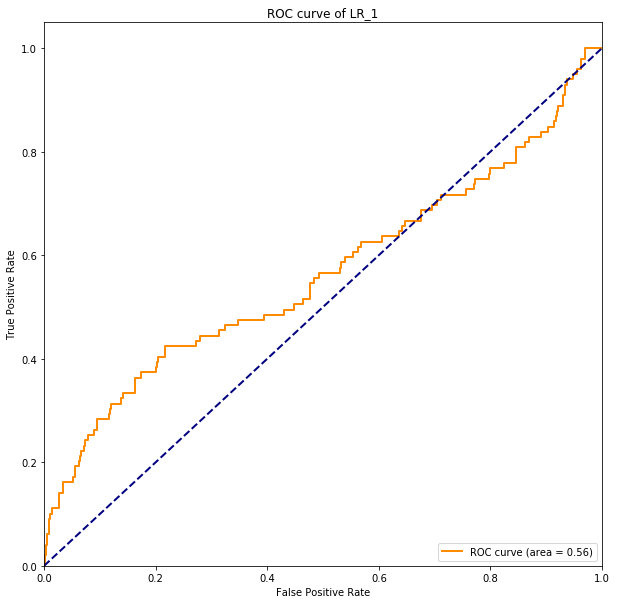

In [29]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()

In [30]:
bank = pd.read_csv("D:\\Users\\zsy\\Desktop\\python PJ\\bank.csv")

In [31]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
bank['month'][bank['month']=='apr']=4
bank['month'][bank['month']=='aug']=8
bank['month'][bank['month']=='dec']=12
bank['month'][bank['month']=='feb']=2
bank['month'][bank['month']=='jan']=1
bank['month'][bank['month']=='jul']=7
bank['month'][bank['month']=='jun']=6
bank['month'][bank['month']=='mar']=3
bank['month'][bank['month']=='may']=5
bank['month'][bank['month']=='nov']=11
bank['month'][bank['month']=='oct']=10
bank['month'][bank['month']=='sep']=9
bank['month'] = bank['month'].apply(lambda x:int(x))

In [33]:
continous=['age','balance','day','month','duration','campaign','pdays','previous','y']
total = ['age','balance','day','month','duration','campaign','pdays','previous','job','marital','education','default','housing','loan','contact','poutcome','y']

In [34]:
bank_con = bank[continous]
bank=bank[total]

#### build network(get dummies)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(bank.drop(columns = ['y']),bank['y'],train_size=0.8,random_state=2020)

x_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [36]:
#get_dummies
cat =['job','marital','education','default','housing','loan','contact','poutcome']
x_train = pd.get_dummies(x_train, columns=cat)
x_test = pd.get_dummies(x_test, columns=cat)

In [37]:
#standardization of the features:
from sklearn.preprocessing import StandardScaler

x_train_scaled = x_train
x_test_scaled = x_test

scaler = StandardScaler().fit(x_train.iloc[:,0:8])
x_train_scaled.iloc[:,0:8] = scaler.transform(x_train.iloc[:,0:8])
x_test_scaled.iloc[:,0:8] = scaler.transform(x_test.iloc[:,0:8])

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_train.columns)

In [38]:
x_train_scaled.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.394348,-0.181315,-0.110961,-0.901427,-0.483943,0.408395,2.893382,0.861563,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0
1,0.914045,0.054191,-1.448822,-1.742170,-0.263251,-0.574363,-0.405790,-0.323906,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
2,3.624287,0.039103,-1.205574,0.780059,0.255567,-0.246777,-0.405790,-0.323906,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
3,1.474785,-0.433550,-0.232585,0.359687,-0.696890,-0.246777,-0.405790,-0.323906,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
4,0.633675,-0.468647,1.226899,-0.481056,-0.619455,-0.574363,-0.405790,-0.323906,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1


In [39]:
x_test_scaled.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.568241,-0.467991,1.105275,0.359687,0.065850,2.046325,-0.40579,-0.323906,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
1,-1.048544,-0.259380,-0.232585,0.359687,0.360106,1.063567,-0.40579,-0.323906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
2,1.100958,-0.232812,-0.232585,-0.481056,-0.135482,-0.574363,-0.40579,-0.323906,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
3,-0.581261,0.459604,0.497157,-0.060684,-0.940813,3.029083,-0.40579,-0.323906,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4,-0.955087,-0.260036,-1.448822,-0.481056,0.336875,0.408395,-0.40579,-0.323906,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1


In [40]:
#data processing on y for the use of keras and tensorflow
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le = LabelEncoder().fit(y_train)
y_train_ohc = le.transform(y_train)
y_test_ohc = le.transform(y_test)

lb = LabelBinarizer().fit(y_train_ohc)
y_train_ohc = lb.transform(y_train_ohc)
y_test_ohc = lb.transform(y_test_ohc)

print("le labels:", le.classes_)
print("lb labels:", lb.classes_)

le labels: ['no' 'yes']
lb labels: [0 1]


In [41]:
from keras import layers
# Create sequential model
model_drop = keras.Sequential()

# Add layers, first layer needs input dimension
model_drop.add(layers.Dense(60, input_shape = (x_train_scaled.shape[1],), activation="relu"))
model_drop.add(layers.Dropout(0.2))
model_drop.add(layers.Dense(60, activation="relu"))
model_drop.add(layers.Dropout(0.2))
model_drop.add(layers.Dense(1, activation = "sigmoid"))

# add loss function and optimizer
model_drop.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Model structure
model_drop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                2460      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 6,181
Trainable params: 6,181
Non-trainable params: 0
_________________________________________________________________


In [42]:
# fit model with our training data set, training will bedone for 300 times data set
bank_tf = model_drop.fit(x = x_train_scaled, y = y_train_ohc, 
                    shuffle = True, 
                    #validation_split = 0.3,
                    batch_size = 32,                    
                    epochs = 600
                   )

Epoch 1/600
113/113 [==============================] - 0s 887us/step - loss: 1.3912e-08 - accuracy: 0.8070
Epoch 2/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.8075
Epoch 3/600
113/113 [==============================] - 0s 810us/step - loss: 1.3912e-08 - accuracy: 0.8075
Epoch 4/600
113/113 [==============================] - 0s 742us/step - loss: 1.3912e-08 - accuracy: 0.7998
Epoch 5/600
113/113 [==============================] - 0s 786us/step - loss: 1.3912e-08 - accuracy: 0.8139
Epoch 6/600
113/113 [==============================] - 0s 742us/step - loss: 1.3912e-08 - accuracy: 0.8075
Epoch 7/600
113/113 [==============================] - 0s 759us/step - loss: 1.3912e-08 - accuracy: 0.8103
Epoch 8/600
113/113 [==============================] - 0s 755us/step - loss: 1.3912e-08 - accuracy: 0.7981
Epoch 9/600
113/113 [==============================] - 0s 865us/step - loss: 1.3912e-08 - accuracy: 0.8075
Epoch 10/600
113/113 [===============

113/113 [==============================] - 0s 731us/step - loss: 1.3912e-08 - accuracy: 0.8097
Epoch 75/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.8031
Epoch 76/600
113/113 [==============================] - 0s 729us/step - loss: 1.3912e-08 - accuracy: 0.7987
Epoch 77/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.8045
Epoch 78/600
113/113 [==============================] - 0s 747us/step - loss: 1.3912e-08 - accuracy: 0.8053
Epoch 79/600
113/113 [==============================] - 0s 713us/step - loss: 1.3912e-08 - accuracy: 0.8136
Epoch 80/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.8097
Epoch 81/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8039
Epoch 82/600
113/113 [==============================] - 0s 680us/step - loss: 1.3912e-08 - accuracy: 0.8053
Epoch 83/600
113/113 [===================

113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.8050
Epoch 150/600
113/113 [==============================] - 0s 749us/step - loss: 1.3912e-08 - accuracy: 0.8089
Epoch 151/600
113/113 [==============================] - 0s 699us/step - loss: 1.3912e-08 - accuracy: 0.8136
Epoch 152/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.8001
Epoch 153/600
113/113 [==============================] - 0s 680us/step - loss: 1.3912e-08 - accuracy: 0.8064
Epoch 154/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.8045
Epoch 155/600
113/113 [==============================] - 0s 695us/step - loss: 1.3912e-08 - accuracy: 0.8106
Epoch 156/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.8009
Epoch 157/600
113/113 [==============================] - 0s 696us/step - loss: 1.3912e-08 - accuracy: 0.8078
Epoch 158/600
113/113 [==========

113/113 [==============================] - 0s 723us/step - loss: 1.3912e-08 - accuracy: 0.8061
Epoch 225/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.8017
Epoch 226/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.8006
Epoch 227/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.8031
Epoch 228/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8119
Epoch 229/600
113/113 [==============================] - 0s 776us/step - loss: 1.3912e-08 - accuracy: 0.8106
Epoch 230/600
113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.8064
Epoch 231/600
113/113 [==============================] - 0s 847us/step - loss: 1.3912e-08 - accuracy: 0.8039
Epoch 232/600
113/113 [==============================] - 0s 883us/step - loss: 1.3912e-08 - accuracy: 0.8039
Epoch 233/600
113/113 [==========

113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.8133
Epoch 300/600
113/113 [==============================] - 0s 708us/step - loss: 1.3912e-08 - accuracy: 0.8122
Epoch 301/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8020
Epoch 302/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8089
Epoch 303/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.8056
Epoch 304/600
113/113 [==============================] - 0s 707us/step - loss: 1.3912e-08 - accuracy: 0.8086
Epoch 305/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8050
Epoch 306/600
113/113 [==============================] - 0s 734us/step - loss: 1.3912e-08 - accuracy: 0.8059
Epoch 307/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8001
Epoch 308/600
113/113 [==========

113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7912
Epoch 375/600
113/113 [==============================] - 0s 712us/step - loss: 1.3912e-08 - accuracy: 0.7976
Epoch 376/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.8012
Epoch 377/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8067
Epoch 378/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8037
Epoch 379/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.7995
Epoch 380/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.8078
Epoch 381/600
113/113 [==============================] - 0s 716us/step - loss: 1.3912e-08 - accuracy: 0.8067
Epoch 382/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8039
Epoch 383/600
113/113 [==========

113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.8072
Epoch 449/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.8037
Epoch 450/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.8095
Epoch 451/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.8025
Epoch 452/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.8089
Epoch 453/600
113/113 [==============================] - 0s 768us/step - loss: 1.3912e-08 - accuracy: 0.8064
Epoch 454/600
113/113 [==============================] - 0s 734us/step - loss: 1.3912e-08 - accuracy: 0.8034
Epoch 455/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.8059
Epoch 456/600
113/113 [==============================] - 0s 680us/step - loss: 1.3912e-08 - accuracy: 0.8045
Epoch 457/600
113/113 [==========

113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8031
Epoch 524/600
113/113 [==============================] - 0s 688us/step - loss: 1.3912e-08 - accuracy: 0.8086
Epoch 525/600
113/113 [==============================] - 0s 742us/step - loss: 1.3912e-08 - accuracy: 0.8050
Epoch 526/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8072
Epoch 527/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.8045
Epoch 528/600
113/113 [==============================] - 0s 707us/step - loss: 1.3912e-08 - accuracy: 0.8092
Epoch 529/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.7998
Epoch 530/600
113/113 [==============================] - 0s 689us/step - loss: 1.3912e-08 - accuracy: 0.8067
Epoch 531/600
113/113 [==============================] - 0s 680us/step - loss: 1.3912e-08 - accuracy: 0.8108
Epoch 532/600
113/113 [==========

113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8061
Epoch 599/600
113/113 [==============================] - 0s 706us/step - loss: 1.3912e-08 - accuracy: 0.8039
Epoch 600/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.8061


In [43]:
test_loss, test_metrics = model_drop.evaluate(x_test_scaled, y_test_ohc)
print("Test loss:", test_loss)
print("Test acc:", test_metrics)

29/29 [==============================] - 0s 516us/step - loss: 1.3041e-08 - accuracy: 0.8575
Test loss: 1.3040573954015144e-08
Test acc: 0.8574585914611816


In [44]:
glm_prob = model_drop.predict(x_test_scaled)

In [45]:
pred=[]
for x in glm_prob:
    if x[0]<0.5:
        pred.append('no')
    else:
        pred.append('yes')

In [46]:
y_true = y_test.values

In [47]:
confusion_matrix(y_true, pred,labels=['yes','no'])

array([[ 11,  88],
       [ 41, 765]], dtype=int64)

In [48]:
(pred == y_true).mean()

0.8574585635359117

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_true,pred))

              precision    recall  f1-score   support

          no       0.90      0.95      0.92       806
         yes       0.21      0.11      0.15        99

    accuracy                           0.86       905
   macro avg       0.55      0.53      0.53       905
weighted avg       0.82      0.86      0.84       905



In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [51]:
y_true[y_true=='yes'] = 1
y_true[y_true=='no'] = 0

In [52]:
y=np.array(y_true)
score = np.array(glm_prob)

In [53]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

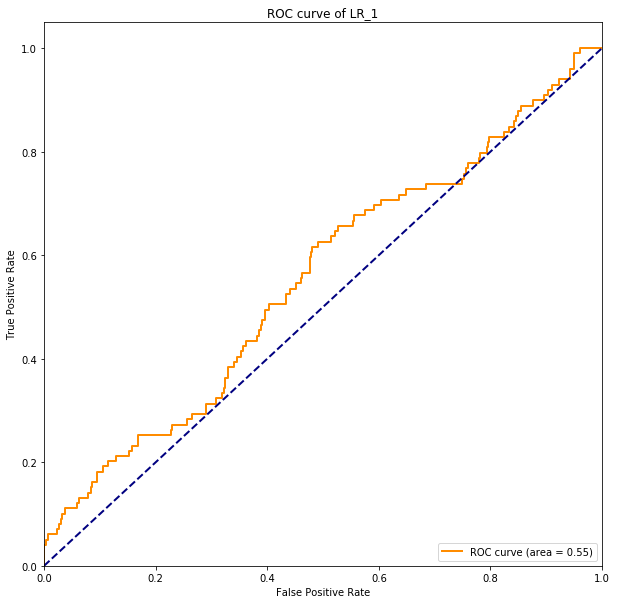

In [54]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()

In [55]:
bank = pd.read_csv("D:\\Users\\zsy\\Desktop\\python PJ\\bank.csv")

In [56]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [57]:
bank['month'][bank['month']=='apr']=4
bank['month'][bank['month']=='aug']=8
bank['month'][bank['month']=='dec']=12
bank['month'][bank['month']=='feb']=2
bank['month'][bank['month']=='jan']=1
bank['month'][bank['month']=='jul']=7
bank['month'][bank['month']=='jun']=6
bank['month'][bank['month']=='mar']=3
bank['month'][bank['month']=='may']=5
bank['month'][bank['month']=='nov']=11
bank['month'][bank['month']=='oct']=10
bank['month'][bank['month']=='sep']=9
bank['month'] = bank['month'].apply(lambda x:int(x))

In [58]:
continous=['age','balance','day','month','duration','campaign','pdays','previous','y']
total = ['age','balance','day','month','duration','campaign','pdays','previous','job','marital','education','default','housing','loan','contact','poutcome','y']

In [59]:
bank_con = bank[continous]
bank=bank[total]

#### target_encoder

In [60]:
import category_encoders as ce

In [61]:
import copy
bank_tar = copy.deepcopy(bank)

In [62]:
bank_tar['y_f']=bank_tar['y']
bank_tar['y_f'][bank_tar['y']=='no'] = 1
bank_tar['y_f'][bank_tar['y']=='yes'] = 0
bank_tar['y_f'] = bank_tar['y_f'].apply(lambda x :int(x))

In [63]:
tar = ['job','marital','education','default','housing','loan','contact','poutcome']

In [64]:
encoder_1 = ce.TargetEncoder(cols=tar).fit(bank_tar,bank_tar['y_f'])
bank_tar = encoder_1.transform(bank_tar)

In [65]:
del bank_tar['y_f']

In [66]:
x_train,x_test,y_train,y_test = train_test_split(bank_tar.drop(columns = ['y']),bank_tar['y'],train_size=0.8,random_state=2020)

x_train.reset_index(inplace = True, drop = True)
x_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [67]:
#standardization of the features:
from sklearn.preprocessing import StandardScaler

x_train_scaled = x_train
x_test_scaled = x_test

scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_train.columns)

In [68]:
x_train_scaled.head()

,age,balance,day,month,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,poutcome
0,-0.394348,-0.181315,-0.110961,-0.901427,-0.483943,0.408395,2.893382,0.861563,-0.496467,-1.171995,-1.491967,0.13316,0.873031,-0.423087,-0.637110,-0.139218
1,0.914045,0.054191,-1.448822,-1.742170,-0.263251,-0.574363,-0.405790,-0.323906,0.349738,-1.171995,-1.491967,0.13316,-1.145435,-0.423087,-0.694037,0.260311
2,3.624287,0.039103,-1.205574,0.780059,0.255567,-0.246777,-0.405790,-0.323906,-3.002531,0.787368,1.129812,0.13316,-1.145435,-0.423087,-0.637110,0.260311
3,1.474785,-0.433550,-0.232585,0.359687,-0.696890,-0.246777,-0.405790,-0.323906,-3.002531,0.787368,0.490164,0.13316,-1.145435,-0.423087,-0.637110,0.260311
4,0.633675,-0.468647,1.226899,-0.481056,-0.619455,-0.574363,-0.405790,-0.323906,1.070010,0.787368,0.490164,0.13316,0.873031,-0.423087,1.555801,0.260311


In [69]:
x_test_scaled.head()

,age,balance,day,month,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,poutcome
0,1.568241,-0.467991,1.105275,0.359687,0.065850,2.046325,-0.40579,-0.323906,-0.147904,0.787368,0.490164,0.13316,0.873031,2.363582,-0.694037,0.260311
1,-1.048544,-0.259380,-0.232585,0.359687,0.360106,1.063567,-0.40579,-0.323906,0.658663,-1.171995,0.490164,0.13316,-1.145435,-0.423087,-0.637110,0.260311
2,1.100958,-0.232812,-0.232585,-0.481056,-0.135482,-0.574363,-0.40579,-0.323906,0.185914,0.787368,0.490164,0.13316,0.873031,-0.423087,1.555801,0.260311
3,-0.581261,0.459604,0.497157,-0.060684,-0.940813,3.029083,-0.40579,-0.323906,-0.147904,-1.171995,0.490164,0.13316,-1.145435,-0.423087,1.555801,0.260311
4,-0.955087,-0.260036,-1.448822,-0.481056,0.336875,0.408395,-0.40579,-0.323906,0.185914,0.787368,-1.491967,0.13316,0.873031,-0.423087,-0.637110,0.260311


In [70]:
#data processing on y for the use of keras and tensorflow
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le = LabelEncoder().fit(y_train)
y_train_ohc = le.transform(y_train)
y_test_ohc = le.transform(y_test)

lb = LabelBinarizer().fit(y_train_ohc)
y_train_ohc = lb.transform(y_train_ohc)
y_test_ohc = lb.transform(y_test_ohc)

print("le labels:", le.classes_)
print("lb labels:", lb.classes_)

le labels: ['no' 'yes']
lb labels: [0 1]


In [71]:
from keras import layers
# Create sequential model
model_drop = keras.Sequential()

# Add layers, first layer needs input dimension
model_drop.add(layers.Dense(80, input_shape = (x_train_scaled.shape[1],), activation="relu"))
model_drop.add(layers.Dropout(0.2))
model_drop.add(layers.Dense(80, activation="relu"))
model_drop.add(layers.Dropout(0.2))
model_drop.add(layers.Dense(1, activation = "sigmoid"))

# add loss function and optimizer
model_drop.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Model structure
model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                1360      
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 81        
Total params: 7,921
Trainable params: 7,921
Non-trainable params: 0
_________________________________________________________________


In [72]:
# fit model with our training data set, training will bedone for 300 times data set
bank_tf = model_drop.fit(x = x_train_scaled, y = y_train_ohc, 
                    shuffle = True, 
                    #validation_split = 0.3,
                    batch_size = 32,                    
                    epochs = 600
                   )

Epoch 1/600
113/113 [==============================] - 0s 763us/step - loss: 1.3912e-08 - accuracy: 0.7091
Epoch 2/600
113/113 [==============================] - 0s 785us/step - loss: 1.3912e-08 - accuracy: 0.7110
Epoch 3/600
113/113 [==============================] - 0s 768us/step - loss: 1.3912e-08 - accuracy: 0.6991
Epoch 4/600
113/113 [==============================] - 0s 784us/step - loss: 1.3912e-08 - accuracy: 0.7002
Epoch 5/600
113/113 [==============================] - 0s 823us/step - loss: 1.3912e-08 - accuracy: 0.7229
Epoch 6/600
113/113 [==============================] - 0s 812us/step - loss: 1.3912e-08 - accuracy: 0.7127
Epoch 7/600
113/113 [==============================] - 0s 771us/step - loss: 1.3912e-08 - accuracy: 0.7027
Epoch 8/600
113/113 [==============================] - 0s 821us/step - loss: 1.3912e-08 - accuracy: 0.7060
Epoch 9/600
113/113 [==============================] - 0s 777us/step - loss: 1.3912e-08 - accuracy: 0.7149
Epoch 10/600
113/113 [===============

Epoch 77/600
113/113 [==============================] - 0s 750us/step - loss: 1.3912e-08 - accuracy: 0.7066
Epoch 78/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7113
Epoch 79/600
113/113 [==============================] - 0s 740us/step - loss: 1.3912e-08 - accuracy: 0.7060
Epoch 80/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7182
Epoch 81/600
113/113 [==============================] - 0s 757us/step - loss: 1.3912e-08 - accuracy: 0.7168
Epoch 82/600
113/113 [==============================] - 0s 740us/step - loss: 1.3912e-08 - accuracy: 0.7052
Epoch 83/600
113/113 [==============================] - 0s 718us/step - loss: 1.3912e-08 - accuracy: 0.7248
Epoch 84/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7088
Epoch 85/600
113/113 [==============================] - 0s 736us/step - loss: 1.3912e-08 - accuracy: 0.7060
Epoch 86/600
113/113 [======

113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.7093
Epoch 153/600
113/113 [==============================] - 0s 742us/step - loss: 1.3912e-08 - accuracy: 0.7082
Epoch 154/600
113/113 [==============================] - 0s 757us/step - loss: 1.3912e-08 - accuracy: 0.7199
Epoch 155/600
113/113 [==============================] - 0s 828us/step - loss: 1.3912e-08 - accuracy: 0.7135
Epoch 156/600
113/113 [==============================] - 0s 936us/step - loss: 1.3912e-08 - accuracy: 0.7044
Epoch 157/600
113/113 [==============================] - 0s 847us/step - loss: 1.3912e-08 - accuracy: 0.7085
Epoch 158/600
113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.7005
Epoch 159/600
113/113 [==============================] - 0s 847us/step - loss: 1.3912e-08 - accuracy: 0.7091
Epoch 160/600
113/113 [==============================] - 0s 830us/step - loss: 1.3912e-08 - accuracy: 0.7046
Epoch 161/600
113/113 [==========

113/113 [==============================] - 0s 732us/step - loss: 1.3912e-08 - accuracy: 0.6952
Epoch 228/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7069
Epoch 229/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.7035
Epoch 230/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7074
Epoch 231/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7063
Epoch 232/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7093
Epoch 233/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.7008
Epoch 234/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.6999
Epoch 235/600
113/113 [==============================] - 0s 750us/step - loss: 1.3912e-08 - accuracy: 0.7033
Epoch 236/600
113/113 [==========

113/113 [==============================] - 0s 742us/step - loss: 1.3912e-08 - accuracy: 0.7129
Epoch 303/600
113/113 [==============================] - 0s 750us/step - loss: 1.3912e-08 - accuracy: 0.7116
Epoch 304/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.7063
Epoch 305/600
113/113 [==============================] - 0s 715us/step - loss: 1.3912e-08 - accuracy: 0.7146
Epoch 306/600
113/113 [==============================] - 0s 725us/step - loss: 1.3912e-08 - accuracy: 0.7135
Epoch 307/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.7118
Epoch 308/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7185
Epoch 309/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7116
Epoch 310/600
113/113 [==============================] - 0s 759us/step - loss: 1.3912e-08 - accuracy: 0.7196
Epoch 311/600
113/113 [==========

113/113 [==============================] - 0s 744us/step - loss: 1.3912e-08 - accuracy: 0.7140
Epoch 378/600
113/113 [==============================] - 0s 740us/step - loss: 1.3912e-08 - accuracy: 0.7035
Epoch 379/600
113/113 [==============================] - 0s 721us/step - loss: 1.3912e-08 - accuracy: 0.7091
Epoch 380/600
113/113 [==============================] - 0s 732us/step - loss: 1.3912e-08 - accuracy: 0.7077
Epoch 381/600
113/113 [==============================] - 0s 727us/step - loss: 1.3912e-08 - accuracy: 0.7127
Epoch 382/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7118
Epoch 383/600
113/113 [==============================] - 0s 697us/step - loss: 1.3912e-08 - accuracy: 0.7016
Epoch 384/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.7140
Epoch 385/600
113/113 [==============================] - 0s 754us/step - loss: 1.3912e-08 - accuracy: 0.7071
Epoch 386/600
113/113 [==========

113/113 [==============================] - 0s 746us/step - loss: 1.3912e-08 - accuracy: 0.7143
Epoch 452/600
113/113 [==============================] - 0s 743us/step - loss: 1.3912e-08 - accuracy: 0.7016
Epoch 453/600
113/113 [==============================] - 0s 731us/step - loss: 1.3912e-08 - accuracy: 0.7118
Epoch 454/600
113/113 [==============================] - 0s 724us/step - loss: 1.3912e-08 - accuracy: 0.7080
Epoch 455/600
113/113 [==============================] - 0s 745us/step - loss: 1.3912e-08 - accuracy: 0.6988
Epoch 456/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.6975
Epoch 457/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.7113
Epoch 458/600
113/113 [==============================] - 0s 708us/step - loss: 1.3912e-08 - accuracy: 0.7196
Epoch 459/600
113/113 [==============================] - 0s 741us/step - loss: 1.3912e-08 - accuracy: 0.7093
Epoch 460/600
113/113 [==========

113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.7140
Epoch 527/600
113/113 [==============================] - 0s 847us/step - loss: 1.3912e-08 - accuracy: 0.7196
Epoch 528/600
113/113 [==============================] - 0s 870us/step - loss: 1.3912e-08 - accuracy: 0.7135
Epoch 529/600
113/113 [==============================] - 0s 871us/step - loss: 1.3912e-08 - accuracy: 0.7110
Epoch 530/600
113/113 [==============================] - 0s 856us/step - loss: 1.3912e-08 - accuracy: 0.7146
Epoch 531/600
113/113 [==============================] - 0s 857us/step - loss: 1.3912e-08 - accuracy: 0.7146
Epoch 532/600
113/113 [==============================] - 0s 810us/step - loss: 1.3912e-08 - accuracy: 0.7105
Epoch 533/600
113/113 [==============================] - 0s 734us/step - loss: 1.3912e-08 - accuracy: 0.7063
Epoch 534/600
113/113 [==============================] - 0s 733us/step - loss: 1.3912e-08 - accuracy: 0.7146
Epoch 535/600
113/113 [==========

In [73]:
test_loss, test_metrics = model_drop.evaluate(x_test_scaled, y_test_ohc)
print("Test loss:", test_loss)
print("Test acc:", test_metrics)

29/29 [==============================] - 0s 619us/step - loss: 1.3041e-08 - accuracy: 0.7657
Test loss: 1.3040573954015144e-08
Test acc: 0.7657458782196045


In [74]:
glm_prob = model_drop.predict(x_test_scaled)

In [75]:
pred=[]
for x in glm_prob:
    if x[0]<0.5:
        pred.append('no')
    else:
        pred.append('yes')

In [76]:
y_true = y_test.values

In [77]:
confusion_matrix(y_true, pred,labels=['yes','no'])

array([[ 22,  77],
       [135, 671]], dtype=int64)

In [78]:
(pred == y_true).mean()

0.7657458563535912

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_true,pred))

              precision    recall  f1-score   support

          no       0.90      0.83      0.86       806
         yes       0.14      0.22      0.17        99

    accuracy                           0.77       905
   macro avg       0.52      0.53      0.52       905
weighted avg       0.81      0.77      0.79       905



In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [81]:
y_true[y_true=='yes'] = 1
y_true[y_true=='no'] = 0

In [82]:
y=np.array(y_true)
score = np.array(glm_prob)

In [83]:
y = y.astype(int)

<Figure size 432x288 with 0 Axes>

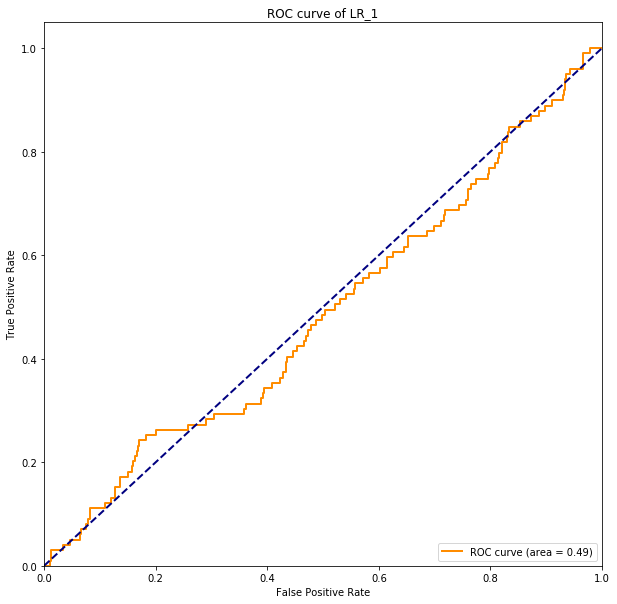

In [84]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y,score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR_1')
plt.legend(loc="lower right")
plt.show()